In [1]:
# Data and Stats packages
import numpy as np
import pandas as pd
pd.set_option('max_columns', 200)

# Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
sns.set()

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('all_seasons.csv')
print(data.shape)
data.head()

(11145, 22)


,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,55,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,24,15,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,58,9,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,9,64,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,10,27,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11145 entries, 0 to 11144
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         11145 non-null  int64  
 1   player_name        11145 non-null  object 
 2   team_abbreviation  11145 non-null  object 
 3   age                11145 non-null  float64
 4   player_height      11145 non-null  float64
 5   player_weight      11145 non-null  float64
 6   college            11145 non-null  object 
 7   country            11145 non-null  object 
 8   draft_year         11145 non-null  object 
 9   draft_round        11145 non-null  object 
 10  draft_number       11145 non-null  object 
 11  gp                 11145 non-null  int64  
 12  pts                11145 non-null  float64
 13  reb                11145 non-null  float64
 14  ast                11145 non-null  float64
 15  net_rating         11145 non-null  float64
 16  oreb_pct           111

In [4]:
columns = ['age', 'player_height', 'player_weight', 'gp', 'pts', 'reb', 'ast']
data = data[columns]
data.head()

,age,player_height,player_weight,gp,pts,reb,ast
0,36.0,198.12,99.790240,55,5.7,16.1,3.1
1,28.0,215.90,117.933920,15,2.3,1.5,0.3
2,39.0,205.74,95.254320,9,0.8,1.0,0.4
3,24.0,203.20,100.697424,64,3.7,2.3,0.6
4,34.0,205.74,108.862080,27,2.4,2.4,0.2


In [5]:
data.describe()

,age,player_height,player_weight,gp,pts,reb,ast
count,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000
mean,27.168686,200.812818,100.637868,52.005832,8.126487,3.560036,1.801463
std,4.344164,9.190973,12.576295,25.069495,5.935482,2.495394,1.789940
min,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000
25%,24.000000,195.580000,90.718400,32.000000,3.500000,1.800000,0.600000
50%,27.000000,200.660000,99.790240,58.000000,6.600000,3.000000,1.200000
75%,30.000000,208.280000,109.315672,74.000000,11.500000,4.700000,2.400000
max,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000


Text(0.5, 1.0, 'Histogram of average points scored')

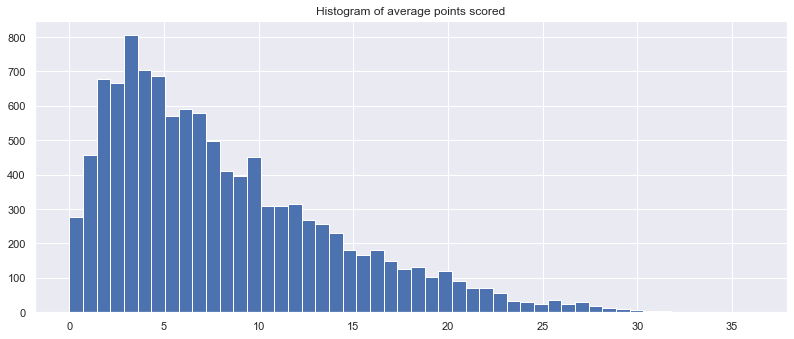

In [9]:
fig, ax = plt.subplots(figsize=(12,5))
ax.hist(data['pts'], bins=50)
ax.set_title('Histogram of average points scored')

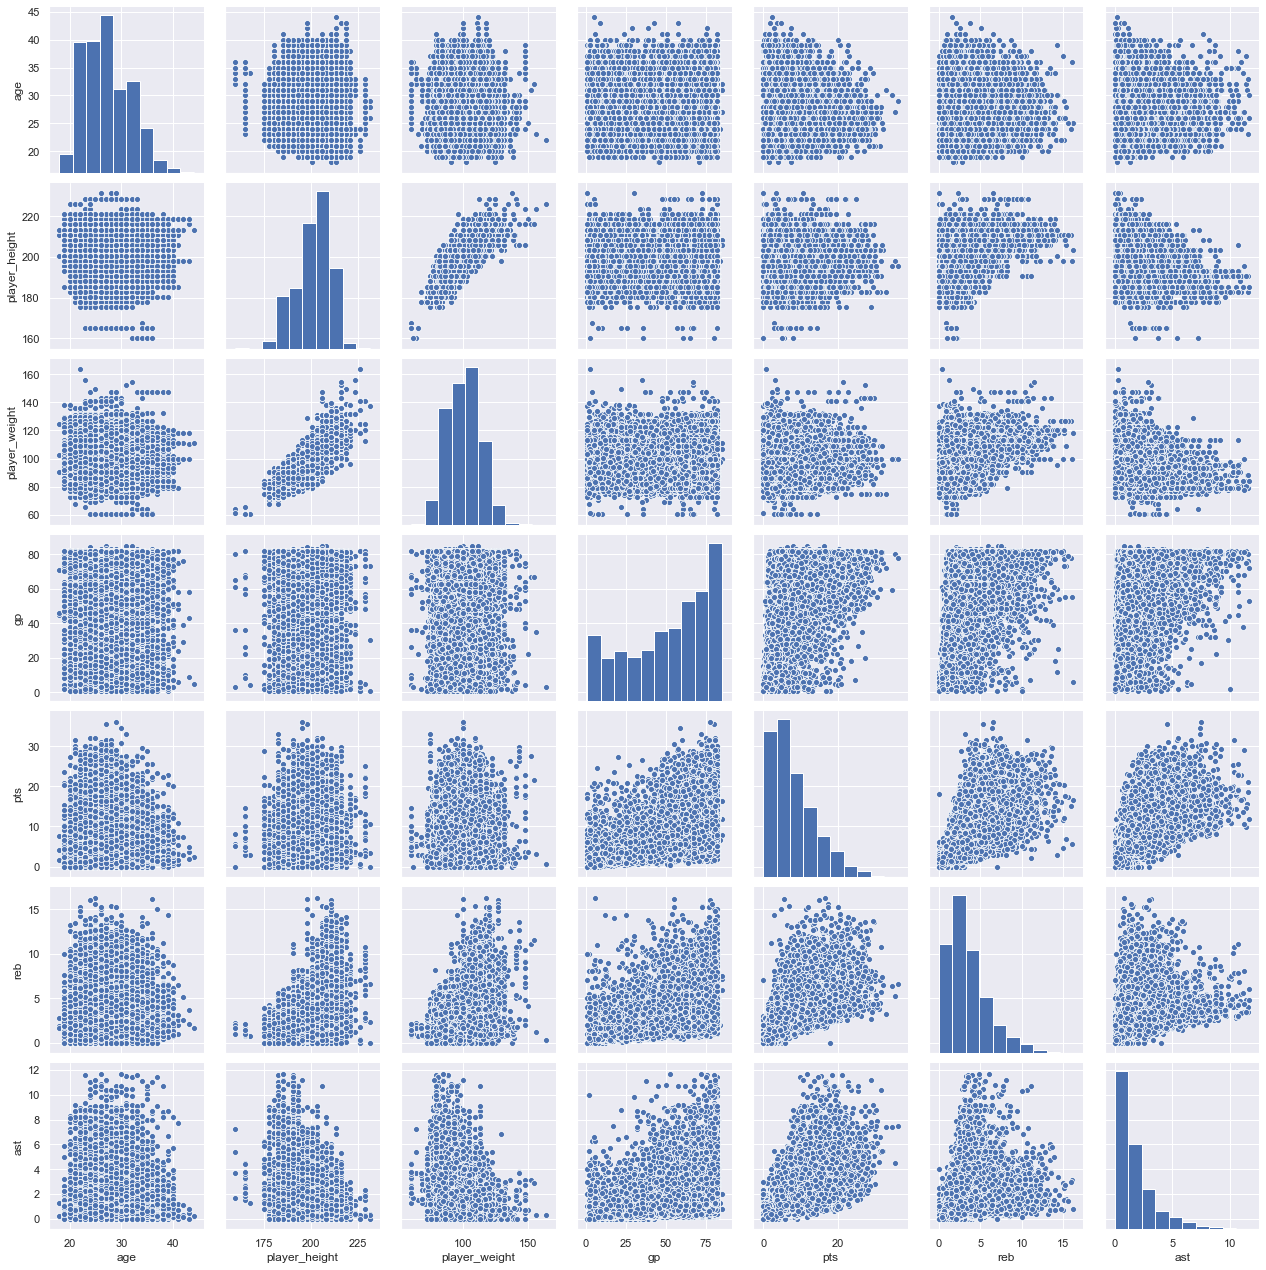

In [10]:
sns.pairplot(data)

In [11]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(data, test_size=0.3)

print('Train Set: {0:0.2f}%'.format(100*train_df.size/data.size))
print('Test Set: {0:0.2f}%'.format(100*test_df.size/data.size))

Train Set: 70.00%
Test Set: 30.00%


In [12]:
from sklearn.preprocessing import StandardScaler

features = ['age', 'player_height', 'player_weight', 'gp', 'reb', 'ast']

X_train = train_df[features]
y_train = np.array(train_df['pts']).reshape(-1, 1)

X_test = test_df[features]
y_test = np.array(test_df['pts']).reshape(-1, 1)

scaler = StandardScaler().fit(X_train)

X_train_t = scaler.transform(X_train)
X_test_t = scaler.transform(X_test)

X_train_df = pd.DataFrame(X_train_t, columns=features)
X_test_df = pd.DataFrame(X_test_t, columns=features)

In [13]:
X_train_df.describe()

,age,player_height,player_weight,gp,reb,ast
count,7.801000e+03,7.801000e+03,7.801000e+03,7.801000e+03,7.801000e+03,7.801000e+03
mean,-2.967189e-16,1.119048e-15,2.945058e-16,6.762242e-17,-2.909194e-16,8.328452e-17
std,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00
min,-2.120306e+00,-4.419041e+00,-3.217925e+00,-2.068142e+00,-1.429489e+00,-1.011538e+00
25%,-7.343655e-01,-5.634629e-01,-7.835713e-01,-7.810629e-01,-7.084233e-01,-6.795738e-01
50%,-4.139522e-02,-1.266598e-02,-5.689858e-02,2.646887e-01,-2.277126e-01,-3.476097e-01
75%,6.515750e-01,8.135294e-01,6.697742e-01,9.082281e-01,4.532942e-01,3.716457e-01
max,3.654446e+00,3.292115e+00,5.029811e+00,1.310440e+00,5.020046e+00,5.461761e+00


In [14]:
X_test_df.describe()

,age,player_height,player_weight,gp,reb,ast
count,3344.000000,3344.000000,3344.000000,3344.000000,3344.000000,3344.000000
mean,-0.008101,0.013009,0.036655,-0.055409,-0.011220,-0.049448
std,1.011461,0.988317,1.023957,1.026444,0.998740,0.966491
min,-2.120306,-3.868244,-3.217925,-2.068142,-1.429489,-1.011538
25%,-0.734365,-0.563463,-0.783571,-0.901727,-0.748483,-0.679574
50%,-0.156890,0.262732,0.015769,0.184246,-0.227713,-0.347610
75%,0.651575,0.813529,0.851442,0.868007,0.503368,0.260991
max,3.885436,3.016717,3.758133,1.310440,5.100164,5.406434


In [15]:
scaler = StandardScaler().fit(y_train)
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [16]:
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS

model_1 = OLS(np.array(y_train).reshape(-1,1), sm.add_constant(X_train_df)).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     2837.
Date:                Wed, 25 Mar 2020   Prob (F-statistic):               0.00
Time:                        17:01:05   Log-Likelihood:                -6552.1
No. Observations:                7801   AIC:                         1.312e+04
Df Residuals:                    7794   BIC:                         1.317e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           4.12e-17      0.006   6.49e-15      1.000      -0.012       0.012
age              -0.0640      0.006     -9.975      0.000      -0.077      -0.051
player_height    -0.0021      0.012     -0.166      0.868      -0.026       0.022
player_weight    -0.0383      0.012     -3.271      0.001      -0.061      -0.015
gp                0.1353      0.008     17.702      0.000       0.120       0.150
reb               0.4666      0.009     51.375      0.000       0.449       0.484
ast               0.4871      0.009     56.049      0.000       0.470       0.504
==============================================================================
Omnibus:                      887.559   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2775.156
Skew:                           0.591   Prob(JB):                         0.00
Kurtosis:                       5.672   Cond. No.                         3.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
def add_square_terms(data):
    data = data.copy()
    cols = data.columns.copy()
    for col in cols:
        data['{}^2'.format(col)] = data[col]**2
    return data

In [19]:
X_train_df2 = add_square_terms(X_train)
X_test_df2 = add_square_terms(X_test)

cols = X_train_df2.columns
scaler = StandardScaler().fit(X_train_df2)
X_train_df2 = pd.DataFrame(scaler.transform(X_train_df2), columns=cols)
X_test_df2 = pd.DataFrame(scaler.transform(X_test_df2), columns=cols)

print(X_train_df.shape, X_train_df2.shape)
X_train_df2.head()

(7801, 6) (7801, 12)


,age,player_height,player_weight,gp,reb,ast,age^2,player_height^2,player_weight^2,gp^2,reb^2,ast^2
0,-0.965356,-0.288064,-0.129566,1.069113,-0.067476,0.703610,-0.926176,-0.311751,-0.188225,1.242058,-0.267986,0.219991
1,1.344545,-0.288064,-0.238567,0.948449,0.172880,0.869592,1.344149,-0.311751,-0.293389,1.041175,-0.107309,0.362956
2,-0.734365,0.262732,0.451772,1.069113,0.092761,1.312210,-0.735631,0.243399,0.397258,1.242058,-0.163763,0.808713
3,0.189595,0.262732,-0.420235,1.189777,-0.067476,-0.181628,0.107633,0.243399,-0.465423,1.450718,-0.267986,-0.319610
4,0.420585,0.538131,0.124770,-0.660399,-0.187653,-0.458264,0.338719,0.526244,0.062823,-0.894218,-0.338553,-0.411254


In [20]:
model_2 = OLS(np.array(y_train).reshape(-1,1), sm.add_constant(X_train_df2)).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     1681.
Date:                Wed, 25 Mar 2020   Prob (F-statistic):               0.00
Time:                        17:08:39   Log-Likelihood:                -6083.2
No. Observations:                7801   AIC:                         1.219e+04
Df Residuals:                    7788   BIC:                         1.228e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             4.12e-17      0.006   6.89e-15      1.000      -0.012       0.012
age                 0.2804      0.066      4.239      0.000       0.151       0.410
player_height       2.3502      0.240      9.788      0.000       1.879       2.821
player_weight      -0.0897      0.095     -0.941      0.347      -0.277       0.097
gp                 -0.0823      0.027     -3.045      0.002      -0.135      -0.029
reb                 0.6491      0.024     26.678      0.000       0.601       0.697
ast                 0.9439      0.021     44.224      0.000       0.902       0.986
age^2              -0.3533      0.066     -5.348      0.000      -0.483      -0.224
player_height^2    -2.3232      0.238     -9.761      0.000      -2.790      -1.857
player_weight^2     0.0832      0.092      0.908      0.364      -0.097       0.263
gp^2                0.1430      0.026      5.425      0.000       0.091       0.195
reb^2              -0.2239      0.021    -10.826      0.000      -0.264      -0.183
ast^2              -0.4389      0.018    -24.486      0.000      -0.474      -0.404
==============================================================================
Omnibus:                      705.335   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1795.454
Skew:                           0.528   Prob(JB):                         0.00
Kurtosis:                       5.100   Cond. No.                         123.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
def add_square_and_cube_terms(data):
    data = data.copy()
    cols = data.columns.copy()
    for col in cols:
        data['{}^2'.format(col)] = data[col]**2
        data['{}^3'.format(col)] = data[col]**3
    return data

In [22]:
X_train_df3 = add_square_and_cube_terms(X_train)
X_test_df3 = add_square_and_cube_terms(X_test)

cols = X_train_df3.columns
scaler = StandardScaler().fit(X_train_df3)
X_train_df3 = pd.DataFrame(scaler.transform(X_train_df3), columns=cols)
X_test_df3 = pd.DataFrame(scaler.transform(X_test_df3), columns=cols)

print(X_train_df.shape, X_train_df3.shape)
X_train_df3.head()

(7801, 6) (7801, 18)


,age,player_height,player_weight,gp,reb,ast,age^2,age^3,player_height^2,player_height^3,player_weight^2,player_weight^3,gp^2,gp^3,reb^2,reb^3,ast^2,ast^3
0,-0.965356,-0.288064,-0.129566,1.069113,-0.067476,0.703610,-0.926176,-0.875112,-0.311751,-0.334560,-0.188225,-0.240687,1.242058,1.339040,-0.267986,-0.299543,0.219991,-0.044739
1,1.344545,-0.288064,-0.238567,0.948449,0.172880,0.869592,1.344149,1.318368,-0.311751,-0.334560,-0.293389,-0.339907,1.041175,1.061233,-0.107309,-0.220350,0.362956,0.038504
2,-0.734365,0.262732,0.451772,1.069113,0.092761,1.312210,-0.735631,-0.722205,0.243399,0.223341,0.397258,0.336176,1.242058,1.339040,-0.163763,-0.249621,0.808713,0.342878
3,0.189595,0.262732,-0.420235,1.189777,-0.067476,-0.181628,0.107633,0.027841,0.243399,0.223341,-0.465423,-0.499224,1.450718,1.638768,-0.267986,-0.299543,-0.319610,-0.275889
4,0.420585,0.538131,0.124770,-0.660399,-0.187653,-0.458264,0.338719,0.252726,0.526244,0.512974,0.062823,0.001659,-0.894218,-0.954735,-0.338553,-0.330049,-0.411254,-0.296672


In [23]:
model_3 = OLS(np.array(y_train).reshape(-1,1), sm.add_constant(X_train_df3)).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     1137.
Date:                Wed, 25 Mar 2020   Prob (F-statistic):               0.00
Time:                        17:13:06   Log-Likelihood:                -6041.3
No. Observations:                7801   AIC:                         1.212e+04
Df Residuals:                    7782   BIC:                         1.225e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             4.12e-17      0.006   6.92e-15      1.000      -0.012       0.012
age                 1.7538      0.484      3.625      0.000       0.805       2.702
player_height     -11.3179      3.405     -3.324      0.001     -17.993      -4.643
player_weight       3.4952      0.562      6.219      0.000       2.394       4.597
gp                 -0.1466      0.071     -2.072      0.038      -0.285      -0.008
reb                 0.4340      0.047      9.271      0.000       0.342       0.526
ast                 0.9656      0.040     23.909      0.000       0.886       1.045
age^2              -3.2919      0.963     -3.418      0.001      -5.180      -1.404
age^3               1.4799      0.486      3.048      0.002       0.528       2.432
player_height^2    24.6973      6.826      3.618      0.000      11.317      38.077
player_height^3   -13.3630      3.427     -3.899      0.000     -20.081      -6.645
player_weight^2    -6.9020      1.083     -6.373      0.000      -9.025      -4.779
player_weight^3     3.4256      0.529      6.478      0.000       2.389       4.462
gp^2                0.3791      0.171      2.217      0.027       0.044       0.714
gp^3               -0.1677      0.107     -1.569      0.117      -0.377       0.042
reb^2               0.2518      0.089      2.827      0.005       0.077       0.426
reb^3              -0.2858      0.052     -5.506      0.000      -0.388      -0.184
ast^2              -0.4812      0.077     -6.263      0.000      -0.632      -0.331
ast^3               0.0272      0.047      0.583      0.560      -0.064       0.119
==============================================================================
Omnibus:                      699.563   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1789.308
Skew:                           0.522   Prob(JB):                         0.00
Kurtosis:                       5.101   Cond. No.                     3.61e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
def add_higher_order_polynomial_terms(data, N=5):
    data = data.copy()
    cols = data.columns.copy()
    for col in cols:
        for i in range(2, N+1):
            data['{}^{}'.format(col, i)] = data[col]**i
    return data

In [25]:
N = 7
X_train_dfN = add_higher_order_polynomial_terms(X_train,N)
X_test_dfN = add_higher_order_polynomial_terms(X_test,N)

cols = X_train_dfN.columns
scaler = StandardScaler().fit(X_train_dfN)
X_train_dfN = pd.DataFrame(scaler.transform(X_train_dfN), columns=cols)
X_test_dfN = pd.DataFrame(scaler.transform(X_test_dfN), columns=cols)

print(X_train_df.shape, X_train_dfN.shape)
X_train_dfN.head()

(7801, 6) (7801, 42)


,age,player_height,player_weight,gp,reb,ast,age^2,age^3,age^4,age^5,age^6,age^7,player_height^2,player_height^3,player_height^4,player_height^5,player_height^6,player_height^7,player_weight^2,player_weight^3,player_weight^4,player_weight^5,player_weight^6,player_weight^7,gp^2,gp^3,gp^4,gp^5,gp^6,gp^7,reb^2,reb^3,reb^4,reb^5,reb^6,reb^7,ast^2,ast^3,ast^4,ast^5,ast^6,ast^7
0,-0.965356,-0.288064,-0.129566,1.069113,-0.067476,0.703610,-0.926176,-0.875112,-0.815731,-0.751633,-0.686076,-0.621717,-0.311751,-0.334560,-0.356388,-0.377137,-0.396719,-0.415050,-0.188225,-0.240687,-0.284619,-0.317989,-0.339239,-0.347546,1.242058,1.339040,1.394380,1.423598,1.435040,1.433753,-0.267986,-0.299543,-0.261223,-0.211996,-0.170724,-0.139677,0.219991,-0.044739,-0.130745,-0.140473,-0.127412,-0.111048
1,1.344545,-0.288064,-0.238567,0.948449,0.172880,0.869592,1.344149,1.318368,1.267858,1.195182,1.104435,1.000663,-0.311751,-0.334560,-0.356388,-0.377137,-0.396719,-0.415050,-0.293389,-0.339907,-0.376080,-0.400241,-0.411271,-0.408851,1.041175,1.061233,1.044390,1.006708,0.956752,0.899609,-0.107309,-0.220350,-0.228923,-0.200369,-0.166880,-0.138480,0.362956,0.038504,-0.091455,-0.124137,-0.121158,-0.108785
2,-0.734365,0.262732,0.451772,1.069113,0.092761,1.312210,-0.735631,-0.722205,-0.696303,-0.660762,-0.618637,-0.572829,0.243399,0.223341,0.202685,0.181553,0.160066,0.138341,0.397258,0.336176,0.270915,0.204161,0.138860,0.078056,1.242058,1.339040,1.394380,1.423598,1.435040,1.433753,-0.163763,-0.249621,-0.241458,-0.205097,-0.168515,-0.139011,0.808713,0.342878,0.077513,-0.041266,-0.083629,-0.092680
3,0.189595,0.262732,-0.420235,1.189777,-0.067476,-0.181628,0.107633,0.027841,-0.045802,-0.110176,-0.163290,-0.204344,0.243399,0.223341,0.202685,0.181553,0.160066,0.138341,-0.465423,-0.499224,-0.520234,-0.527498,-0.520670,-0.500250,1.450718,1.638768,1.786597,1.908858,2.013296,2.104507,-0.267986,-0.299543,-0.261223,-0.211996,-0.170724,-0.139677,-0.319610,-0.275889,-0.213822,-0.167563,-0.135748,-0.113521
4,0.420585,0.538131,0.124770,-0.660399,-0.187653,-0.458264,0.338719,0.252726,0.167195,0.086344,0.013553,-0.048908,0.526244,0.512974,0.498413,0.482653,0.465787,0.447905,0.062823,0.001659,-0.056033,-0.107628,-0.150713,-0.183336,-0.894218,-0.954735,-0.940001,-0.898680,-0.851728,-0.807182,-0.338553,-0.330049,-0.272119,-0.215426,-0.171714,-0.139946,-0.411254,-0.296672,-0.217688,-0.168204,-0.135847,-0.113536


In [26]:
model_N = OLS(np.array(y_train).reshape(-1,1), sm.add_constant(X_train_dfN)).fit()
model_N.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     520.6
Date:                Wed, 25 Mar 2020   Prob (F-statistic):               0.00
Time:                        17:17:29   Log-Likelihood:                -5843.3
No. Observations:                7801   AIC:                         1.177e+04
Df Residuals:                    7758   BIC:                         1.207e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.884e-09      0.006   4.96e-07      1.000      -0.011       0.011
age               961.8569    517.386      1.859      0.063     -52.360    1976.074
player_height    1.463e+05   1.09e+05      1.343      0.179   -6.73e+04     3.6e+05
player_weight    1047.2922    257.328      4.070      0.000     542.860    1551.724
gp                  0.5932      0.694      0.854      0.393      -0.768       1.954
reb                -0.7750      0.270     -2.875      0.004      -1.303      -0.247
ast                -0.7037      0.184     -3.823      0.000      -1.065      -0.343
age^2           -5644.0208   3092.041     -1.825      0.068   -1.17e+04     417.214
age^3              1.4e+04   7833.212      1.787      0.074   -1357.012    2.94e+04
age^4           -1.877e+04   1.08e+04     -1.744      0.081   -3.99e+04    2322.358
age^5            1.435e+04   8451.408      1.698      0.089   -2213.313    3.09e+04
age^6           -5926.7235   3592.537     -1.650      0.099    -1.3e+04    1115.619
age^7            1031.7902    644.990      1.600      0.110    -232.565    2296.145
player_height^2  -8.28e+05   6.68e+05     -1.239      0.215   -2.14e+06    4.82e+05
player_height^3   1.94e+06   1.71e+06      1.136      0.256   -1.41e+06    5.29e+06
player_height^4 -2.407e+06   2.33e+06     -1.033      0.301   -6.97e+06    2.16e+06
player_height^5  1.666e+06   1.79e+06      0.931      0.352   -1.84e+06    5.17e+06
player_height^6 -6.089e+05   7.34e+05     -0.830      0.407   -2.05e+06    8.29e+05
player_height^7  9.155e+04   1.25e+05      0.730      0.465   -1.54e+05    3.37e+05
player_weight^2 -6171.8964   1523.798     -4.050      0.000   -9158.952   -3184.841
player_weight^3  1.522e+04   3796.237      4.010      0.000    7781.075    2.27e+04
player_weight^4 -2.013e+04   5097.765     -3.948      0.000   -3.01e+04   -1.01e+04
player_weight^5  1.507e+04   3897.539      3.866      0.000    7428.567    2.27e+04
player_weight^6 -6068.1611   1611.799     -3.765      0.000   -9227.723   -2908.599
player_weight^7  1029.2930    282.266      3.647      0.000     475.976    1582.610
gp^2               -0.6333      8.475     -0.075      0.940     -17.247      15.981
gp^3              -15.7428     42.259     -0.373      0.710     -98.582      67.097
gp^4               71.1124    106.222      0.669      0.503    -137.112     279.337
gp^5             -124.4313    141.977     -0.876      0.381    -402.744     153.881
gp^6               99.0179     96.297      1.028      0.304     -89.751     287.786
gp^7              -29.8352     26.072     -1.144      0.253     -80.943      21.272
reb^2               9.1795      2.316      3.963      0.000       4.639      13.720
reb^3             -30.8086      9.417     -3.272      0.001     -49.268     -12.350
reb^4              60.0813     21.254      2.827      0.005

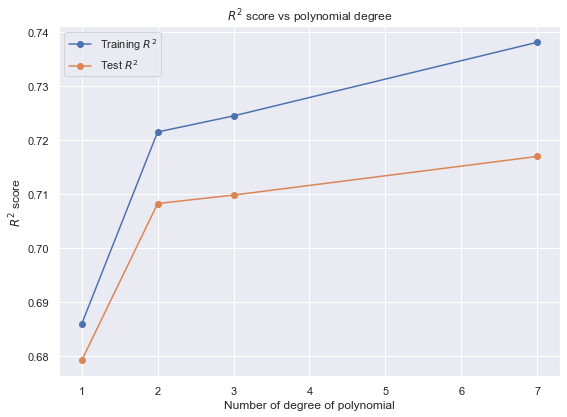

In [27]:
from sklearn.metrics import r2_score

x = [1, 2, 3, N]
models = [model_1, model_2, model_3, model_N]
X_trains = [X_train_df, X_train_df2, X_train_df3, X_train_dfN]
X_tests = [X_test_df, X_test_df2, X_test_df3, X_test_dfN]

r2_train = []
r2_test = []

for i, model in enumerate(models):
    y_pred_train = model.predict(sm.add_constant(X_trains[i]))
    y_pred_test = model.predict(sm.add_constant(X_tests[i]))
    r2_train.append(r2_score(y_train, y_pred_train))
    r2_test.append(r2_score(y_test, y_pred_test))
    
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, r2_train, 'o-', label=r'Training $R^2$')
ax.plot(x, r2_test, 'o-', label=r'Test $R^2$')
ax.set_xlabel('Number of degree of polynomial')
ax.set_ylabel(r'$R^2$ score')
ax.set_title(r'$R^2$ score vs polynomial degree')
ax.legend();

In [30]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

alphas = (0.001, 0.01, 0.1, 10, 100, 1000, 10000)

fitted_ridge = RidgeCV(alphas=alphas).fit(X_train_dfN, y_train)
fitted_lasso = LassoCV(alphas=alphas).fit(X_train_dfN, y_train)

print('R^2 score for our original OLS model: {}\n'.format(r2_test[-1]))

ridge_a = fitted_ridge.alpha_
print('Best alpha for ridge: {}'.format(ridge_a))
print('R^2 score for Ridge with alpha={}: {}\n'.format(ridge_a, fitted_ridge.score(X_test_dfN,y_test)))

lasso_a = fitted_lasso.alpha_
print('Best alpha for lasso: {}'.format(lasso_a))
print('R squared score for Lasso with alpha={}: {}'.format(lasso_a, fitted_lasso.score(X_test_dfN,y_test)))

R^2 score for our original OLS model: 0.7169447105066078

Best alpha for ridge: 0.001
R^2 score for Ridge with alpha=0.001: 0.7165452548585112

Best alpha for lasso: 0.001
R squared score for Lasso with alpha=0.001: 0.7084910806494471
